In [1]:
#%matplotlib notebook
import os
import sys
sys.path.append("numpy_path")
import numpy as np
import struct
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import keras.callbacks as cb
from keras.callbacks import EarlyStopping, ModelCheckpoint
from math import cos, sin, pi
import math
from statistics import mean
import os.path

shape_size = 48

# define loss history
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

#plot losses
def plot_losses(losses):
    plt.plot(losses)
    plt.title('Loss per batch')
    plt.show()

def feature_scaling(X):
    X = X.T
    for i in range(7):
        mean = X[i].mean()
        std = X[i].std()
        X[i] = [(x - mean)/std for x in X[i]]
    return X.T

# input dimension
dim = 200

def init_model():
    model = Sequential()
    model.add(Dense(10, input_dim=dim))
    model.add(Activation('relu'))
    model.add(Dense(50))
    #model.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Dense(50))
    #model.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Dense(70))
    #model.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Dense(80))
    model.add(Activation('relu'))
    model.add(Dense(100))
    #model.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Dense(120))
    #model.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Dense(100))
    #model.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Dense(80))
    model.add(Activation('relu'))
    model.add(Dense(20))
    model.add(Activation('relu'))
    model.add(Dense(6))
    model.add(Activation('sigmoid'))
    # use mean squared error to measure the looses
    model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr = 0.01)
              #metrics=['accuracy']
                 )
    return model

Using TensorFlow backend.


In [4]:
data_size = 0
dummy1 = [0]*200
dummy2 = [0]*6
SP = np.array(np.reshape(dummy1, (1, 200)))
SH = np.array(np.reshape(dummy2, (1, 6)))
for i in range(2, 65):
    path = 'meep_code/data/DATA'+str(i)
    if not os.path.exists(path):
        #miss.append(i)
        print('Missing batch:' + str(i))
        continue
        
    files = next(os.walk(path))[2] #dir is your directory path as string]
    num_data = len(files)
    data_size += num_data
    skip = []
    
    coordinates = np.genfromtxt('meep_code/data/DATA'+str(i)+'_sh.txt')
    xc, yc = coordinates[:, 0], coordinates[:, 1]
    xc = np.reshape(xc, (num_data, shape_size))
    yc = np.reshape(yc, (num_data, shape_size))
    
    for j in range(num_data):
        tmp = np.genfromtxt(path+'/'+'DATA'+str(i)+'_sp'+str(j)+'.txt')
        valid = True
        for q in range(200):
            if math.isnan(float(tmp[q])):
                print('Batch '+str(i)+'\tsample '+str(j)+' has NAN value')
                valid = False
                break
            if tmp[q] > 3:
                print('Batch '+str(i)+'\tsample '+str(j)+' has extreme value')
                valid = False
                break
        if not valid:
            #skip.append(j)
            continue
        SP = np.concatenate((SP, np.reshape(tmp, (1, 200))))
        tmp = []
        for q in range(6):
            tmp.append(math.sqrt(xc[j][q]**2 + yc[j][q]**2))
        SH = np.concatenate((SH, np.reshape(np.array(tmp), (1, 6))))
        #print(SP.shape)
    #print(files)
#     coordinates = np.genfromtxt('meep_code/data/DATA'+str(i)+'_sh.txt')
#     xc, yc = coordinates[:, 0], coordinates[:, 1]
#     xc = np.reshape(xc, (num_data, shape_size))
#     yc = np.reshape(yc, (num_data, shape_size))
#     for j in range(num_data):
#         if j in skip:
#             continue
#         tmp = []
#         for q in range(6):
#             tmp.append(math.sqrt(xc[j][q]**2 + yc[j][q]**2))
#         SH = np.concatenate((SH, np.reshape(np.array(tmp), (1, 6))))
    print('Batch '+str(i)+' has \t'+str(num_data)) 
#     freq = np.genfromtxt('meep_code/data/freq.txt')   
#     for j in range(num_data):
#         print(j)
#         plt.ylim(0, 1.1)
#         plt.plot(freq, SP[data_size - num_data + j + 1])
#         plt.show()
#         plt.axis('equal')
#         plt.ylim(-0.5, 0.5)
#         plt.xlim(-0.5, 0.5)
#         plt.plot(xc[j], yc[j])
#         plt.fill(xc[j], yc[j])
#         plt.show()

Batch 2 has 	7
Batch 3 has 	6
Batch 4 has 	17
Batch 5 has 	5
Batch 6 has 	14
Batch 7 has 	14
Batch 8 has 	40
Batch 9 has 	5
Batch 10 has 	14
Batch 11 has 	14
Batch 12 has 	40
Batch 13 has 	13
Batch 14 has 	37
Batch 15 has 	37
Missing batch:16
Batch 17 has 	5
Batch 18 has 	14
Batch 19 has 	14
Batch 20 has 	40
Batch 21 has 	13
Batch 22 has 	37
Batch 23 has 	37
Batch 24 has 	106
Batch 25 has 	13
Batch 26 has 	37
Batch 27 has 	37
Batch 28 has 	106
Batch 29 has 	35
Batch 30 has 	100
Batch 31 has 	100
Batch 32 has 	287
Batch 33 has 	5
Batch 34 has 	14
Batch 35 has 	14
Batch 36 has 	40
Batch 37 has 	13
Batch 38 has 	37
Batch 39 has 	37
Batch 40 has 	106
Batch 41 has 	13
Batch 42 has 	37
Batch 43 has 	37
Batch 44	sample 81 has extreme value
Batch 44 has 	106
Batch 45 has 	35
Batch 46	sample 80 has extreme value
Batch 46 has 	100
Batch 47	sample 26 has NAN value
Batch 47 has 	100
Batch 48	sample 71 has NAN value
Batch 48	sample 73 has NAN value
Batch 48	sample 75 has NAN value
Batch 48 has 	287

ValueError: cannot reshape array of size 13056 into shape (249,48)

In [52]:
# filt = [6,12,23,24,43,71,72,69,67,72,*[x for x in range(75, 81)],89,*[x for x in range(97, 102)]
#        ,109,110,114,127,*[x for x in range(154, 160)]
#        ,163,168,178,179,180,181,195,196,202,207,216,217,230
#        ,287,312,*[x for x in range(314, 321)],*[x for x in range(343, 349)], 362,369,375,386,388]
# SP_F, SH_F = np.reshape(SP[0], (1, 200)),np.reshape(SH[0], (1, 6))
# for i in range(1, len(SP)):
#     #print(i)
#     if i in filt:
#         continue
#     SP_F = np.concatenate((SP_F, np.reshape(SP[i], (1, 200))))
#     SH_F = np.concatenate((SH_F, np.reshape(SH[i], (1, 6))))

In [12]:
SP.shape

(1289, 200)

In [13]:
SH.shape

(1278, 6)

In [51]:
DATA = np.append(SP, SH, axis = 1)

In [10]:
DATA = DATA[1:]

In [12]:
DATA.shape

(1404, 206)

In [27]:
for i in range(1404):
    for j in range(206):
        if 0 > DATA[i,j] or 1.2 < DATA[i,j]:
            print(DATA[i])
            break

[ 7.43455075e-01  7.80117172e-01  8.13121731e-01  8.42555381e-01
  8.68553847e-01  8.91290656e-01  9.10966913e-01  9.27802186e-01
  9.42026523e-01  9.53873603e-01  9.63575025e-01  9.71355709e-01
  9.77430330e-01  9.82000755e-01  9.85254358e-01  9.87363132e-01
  9.88483499e-01  9.88756686e-01  9.88309606e-01  9.87256127e-01
  9.85698697e-01  9.83730274e-01  9.81436610e-01  9.78898970e-01
  9.76197535e-01  9.73415916e-01  9.70647673e-01  9.68006503e-01
  9.65643511e-01  9.63778726e-01  9.62762177e-01  9.63193464e-01
  9.66078513e-01  9.71168364e-01  8.60379878e-01  5.92483987e-01
  8.20102193e-01  8.57921095e-01  8.70204575e-01  8.74768126e-01
  8.76098850e-01  8.75832395e-01  8.74706557e-01  8.73104641e-01
  8.71247107e-01  8.69270878e-01  8.67266209e-01  8.65295389e-01
  8.63402920e-01  8.61621371e-01  8.59974902e-01  8.58481458e-01
  8.57154189e-01  8.56002364e-01  8.55031979e-01  8.54246143e-01
  8.53645302e-01  8.53227334e-01  8.52987533e-01  8.52918471e-01
  8.53009723e-01  8.53247

[ 9.35716705e-01  9.39735916e-01  9.42497085e-01  9.44210023e-01
  9.45050668e-01  9.45154187e-01  9.44606475e-01  9.43431791e-01
  9.41572473e-01  9.38853048e-01  9.34913348e-01  9.29078095e-01
  9.20090077e-01  9.05533286e-01  8.80507507e-01  8.34409784e-01
  7.43095358e-01  5.54872136e-01  2.24130337e-01  1.47233815e-03
  1.77881129e-01  4.20975149e-01  5.77190473e-01  6.69170924e-01
  7.25541735e-01  7.62271029e-01  7.87752823e-01  8.06606609e-01
  8.21565736e-01  8.34391373e-01  8.46334113e-01  8.58381950e-01
  8.71401105e-01  8.86212657e-01  9.03604944e-01  9.24220171e-01
  9.48100893e-01  9.73230994e-01  9.91067447e-01  9.73903643e-01
  8.50807244e-01  5.38427608e-01  1.72486293e-01  1.03782794e-02
  1.44096013e-02  6.77699881e-02  1.21935819e-01  1.65381260e-01
  1.97387304e-01  2.19481986e-01  2.33193842e-01  2.39555059e-01
  2.39029883e-01  2.31506667e-01  2.16258016e-01  1.91864407e-01
  1.56219748e-01  1.07226011e-01  4.69644659e-02  1.04026449e-03
  8.03750121e-02  4.51681

[ 7.78506653e-01  7.85621683e-01  7.96392657e-01  8.10079323e-01
  8.26013023e-01  8.43600909e-01  8.62326373e-01  8.81745802e-01
  9.01481505e-01  9.21210193e-01  9.40645693e-01  9.59513404e-01
  9.77512093e-01  9.94255442e-01  1.00918043e+00  1.02140091e+00
  1.02947134e+00  1.03100797e+00  1.02210334e+00  9.96509991e-01
  9.44810078e-01  8.54583444e-01  7.14292397e-01  5.24582202e-01
  3.13426780e-01  1.33426587e-01  2.74657559e-02 -1.09950340e-04
  2.69686108e-02  8.17566957e-02  1.45955456e-01  2.09989797e-01
  2.69792264e-01  3.24139132e-01  3.73093052e-01  4.17215143e-01
  4.57199030e-01  4.93714244e-01  5.27347877e-01  5.58590194e-01
  5.87838643e-01  6.15408556e-01  6.41545383e-01  6.66436350e-01
  6.90220807e-01  7.12999131e-01  7.34840283e-01  7.55788221e-01
  7.75867334e-01  7.95087077e-01  8.13445940e-01  8.30934848e-01
  8.47540091e-01  8.63245815e-01  8.78036151e-01  8.91896984e-01
  9.04817405e-01  9.16790859e-01  9.27816009e-01  9.37897329e-01
  9.47045448e-01  9.55277

[ 0.30790733  0.19243796  0.09586671  0.03195197  0.00421807  0.00798936
  0.03521037  0.07800736  0.13014501  0.18717228  0.2460769   0.30487432
  0.36227571  0.41745438  0.46989128  0.51927557  0.56544066  0.60832278
  0.64793326  0.68433934  0.71765014  0.74800597  0.77556962  0.80051912
  0.82304152  0.84332751  0.8615667   0.87794372  0.89263485  0.90580544
  0.91760794  0.92818055  0.93764651  0.94611396  0.95367623  0.96041259
  0.96638936  0.97166119  0.97627261  0.98025959  0.98365117  0.98647069
  0.98873844  0.99047115  0.99168464  0.99239428  0.9926159   0.9923664
  0.99166428  0.99052998  0.988986    0.98705705  0.98476996  0.9821536
  0.97923867  0.97605748  0.97264371  0.9690321   0.96525818  0.96135799
  0.95736779  0.95332382  0.94926207  0.94521807  0.94122675  0.93732228
  0.93353805  0.92990659  0.9264597   0.92322853  0.92024389  0.9175367
  0.91513864  0.91308328  0.91140773  0.91015535  0.90938021  0.90915473
  0.9095836   0.91083028  0.91317124  0.91711164  0.92

[ 8.63556898e-01  8.56971008e-01  8.53554861e-01  8.52966930e-01
  8.54864260e-01  8.58913189e-01  8.64797624e-01  8.72225026e-01
  8.80930239e-01  8.90677244e-01  9.01258855e-01  9.12494226e-01
  9.24223854e-01  9.36301435e-01  9.48581449e-01  9.60900569e-01
  9.73049768e-01  9.84732059e-01  9.95497733e-01  1.00464433e+00
  1.01106200e+00  1.01299713e+00  1.00770376e+00  9.90971360e-01
  9.56612472e-01  8.96282304e-01  8.00635944e-01  6.63592062e-01
  4.90586352e-01  3.05882018e-01  1.46992970e-01  4.37824221e-02
  2.41938249e-03  9.63809486e-03  4.66512325e-02  9.82083492e-02
  1.54672335e-01  2.10849555e-01  2.64321824e-01  3.14200241e-01
  3.60365690e-01  4.03049151e-01  4.42613375e-01  4.79445115e-01
  5.13905565e-01  5.46310513e-01  5.76925158e-01  6.05965834e-01
  6.33604680e-01  6.59975310e-01  6.85178544e-01  7.09287801e-01
  7.32354010e-01  7.54410000e-01  7.75474400e-01  7.95555077e-01
  8.14652268e-01  8.32761116e-01  8.49874133e-01  8.65983170e-01
  8.81081139e-01  8.95163

[9.11029650e+96 7.44285576e+96 6.09284427e+96 4.99773872e+96
 4.10770874e+96 3.38296903e+96 2.79169763e+96 2.30839663e+96
 1.91259908e+96 1.58784719e+96 1.32088358e+96 1.10101013e+96
 9.19578714e+95 7.69586143e+95 6.45351375e+95 5.42257878e+95
 4.56547644e+95 3.85156238e+95 3.25580483e+95 2.75772145e+95
 2.34052378e+95 1.99042752e+95 1.69609569e+95 1.44818830e+95
 1.23899755e+95 1.06215185e+95 9.12375350e+94 7.85292176e+94
 6.77266828e+94 5.85273899e+94 5.06791513e+94 4.39714044e+94
 3.82280517e+94 3.33015778e+94 2.90682083e+94 2.54239198e+94
 2.22811464e+94 1.95660568e+94 1.72162999e+94 1.51791354e+94
 1.34098812e+94 1.18706220e+94 1.05291338e+94 9.35798623e+93
 8.33379322e+93 7.43658539e+93 6.64928452e+93 5.95726244e+93
 5.34797032e+93 4.81062667e+93 4.33595438e+93 3.91595876e+93
 3.54373995e+93 3.21333413e+93 2.91957885e+93 2.65799888e+93
 2.42470895e+93 2.21633118e+93 2.02992455e+93 1.86292477e+93
 1.71309285e+93 1.57847110e+93 1.45734541e+93 1.34821290e+93
 1.24975407e+93 1.160808

In [31]:
DATA = np.append(SP, SH, axis = 1)
DATA = DATA[1:]
np.random.shuffle(DATA)

X = DATA[:, :200]
Y = DATA[:,200:]
X = np.subtract(X, 0.5)
keras.utils.normalize(X)

train_size = int(len(DATA) * 0.8)

train_X = X[0:train_size, :]
train_Y = Y[0:train_size, :]
test_X = X[train_size:, :]
test_Y = Y[train_size:, :]

In [19]:
# freq = np.genfromtxt('meep_code/data/freq.txt')
# for i in range(num_data):
#     print(i)
#     plt.ylim(0, 1.1)
#     plt.plot(freq, train_X[i])
#     plt.show()
#     print(train_Y[i])

In [32]:
model = init_model()
history = LossHistory()
# when training, using minibatch seems to be pretty good
model.fit(train_X, train_Y, epochs=1000, batch_size=10,
                callbacks=[history],
                validation_data=(test_X, test_Y), verbose=2)
score = model.evaluate(test_X, test_Y, batch_size=10)
print(score)
plot_losses(history.losses)

Train on 1277 samples, validate on 320 samples
Epoch 1/1000
 - 7s - loss: nan - val_loss: nan
Epoch 2/1000
 - 2s - loss: nan - val_loss: nan
Epoch 3/1000
 - 2s - loss: nan - val_loss: nan
Epoch 4/1000
 - 2s - loss: nan - val_loss: nan
Epoch 5/1000
 - 1s - loss: nan - val_loss: nan
Epoch 6/1000
 - 1s - loss: nan - val_loss: nan
Epoch 7/1000
 - 2s - loss: nan - val_loss: nan
Epoch 8/1000
 - 1s - loss: nan - val_loss: nan
Epoch 9/1000
 - 1s - loss: nan - val_loss: nan
Epoch 10/1000
 - 2s - loss: nan - val_loss: nan
Epoch 11/1000
 - 2s - loss: nan - val_loss: nan
Epoch 12/1000
 - 2s - loss: nan - val_loss: nan
Epoch 13/1000
 - 2s - loss: nan - val_loss: nan
Epoch 14/1000
 - 2s - loss: nan - val_loss: nan
Epoch 15/1000
 - 2s - loss: nan - val_loss: nan
Epoch 16/1000
 - 2s - loss: nan - val_loss: nan
Epoch 17/1000
 - 2s - loss: nan - val_loss: nan
Epoch 18/1000
 - 2s - loss: nan - val_loss: nan
Epoch 19/1000
 - 2s - loss: nan - val_loss: nan
Epoch 20/1000
 - 2s - loss: nan - val_loss: nan
Ep

Epoch 170/1000
 - 1s - loss: nan - val_loss: nan
Epoch 171/1000
 - 1s - loss: nan - val_loss: nan
Epoch 172/1000
 - 1s - loss: nan - val_loss: nan
Epoch 173/1000
 - 1s - loss: nan - val_loss: nan
Epoch 174/1000
 - 1s - loss: nan - val_loss: nan
Epoch 175/1000
 - 2s - loss: nan - val_loss: nan
Epoch 176/1000
 - 1s - loss: nan - val_loss: nan
Epoch 177/1000
 - 1s - loss: nan - val_loss: nan
Epoch 178/1000
 - 2s - loss: nan - val_loss: nan
Epoch 179/1000
 - 2s - loss: nan - val_loss: nan
Epoch 180/1000
 - 2s - loss: nan - val_loss: nan
Epoch 181/1000
 - 2s - loss: nan - val_loss: nan
Epoch 182/1000
 - 1s - loss: nan - val_loss: nan
Epoch 183/1000
 - 1s - loss: nan - val_loss: nan
Epoch 184/1000
 - 1s - loss: nan - val_loss: nan
Epoch 185/1000
 - 2s - loss: nan - val_loss: nan
Epoch 186/1000
 - 1s - loss: nan - val_loss: nan
Epoch 187/1000
 - 2s - loss: nan - val_loss: nan
Epoch 188/1000
 - 1s - loss: nan - val_loss: nan
Epoch 189/1000
 - 2s - loss: nan - val_loss: nan
Epoch 190/1000
 - 2s

 - 2s - loss: nan - val_loss: nan
Epoch 338/1000
 - 2s - loss: nan - val_loss: nan
Epoch 339/1000
 - 1s - loss: nan - val_loss: nan
Epoch 340/1000
 - 1s - loss: nan - val_loss: nan
Epoch 341/1000
 - 1s - loss: nan - val_loss: nan
Epoch 342/1000
 - 1s - loss: nan - val_loss: nan
Epoch 343/1000
 - 1s - loss: nan - val_loss: nan
Epoch 344/1000
 - 1s - loss: nan - val_loss: nan
Epoch 345/1000
 - 2s - loss: nan - val_loss: nan
Epoch 346/1000
 - 2s - loss: nan - val_loss: nan
Epoch 347/1000
 - 2s - loss: nan - val_loss: nan
Epoch 348/1000
 - 2s - loss: nan - val_loss: nan
Epoch 349/1000
 - 1s - loss: nan - val_loss: nan
Epoch 350/1000
 - 1s - loss: nan - val_loss: nan
Epoch 351/1000
 - 1s - loss: nan - val_loss: nan
Epoch 352/1000
 - 2s - loss: nan - val_loss: nan
Epoch 353/1000
 - 2s - loss: nan - val_loss: nan
Epoch 354/1000
 - 1s - loss: nan - val_loss: nan
Epoch 355/1000
 - 1s - loss: nan - val_loss: nan
Epoch 356/1000
 - 1s - loss: nan - val_loss: nan
Epoch 357/1000
 - 2s - loss: nan - 

KeyboardInterrupt: 

Test 0
True shape: [0.2963065 0.3       0.338636  0.4       0.338636  0.3      ]
Predicted shape: [[0.28571936 0.31026313 0.3503182  0.3859476  0.32345802 0.28863484]]



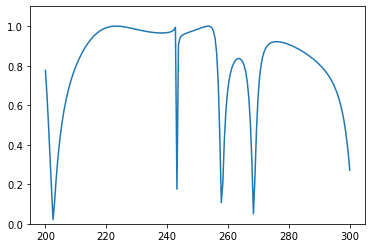

Test 1
True shape: [0.4        0.41826582 0.44988746 0.5        0.4389726  0.4       ]
Predicted shape: [[0.49462396 0.4893507  0.48621473 0.4991828  0.49169588 0.49366987]]



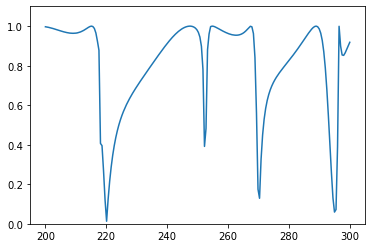

Test 2
True shape: [0.1        0.11044282 0.12680754 0.15329674 0.2        0.19753767]
Predicted shape: [[0.12090978 0.11425826 0.11445814 0.10769138 0.10962804 0.1118148 ]]



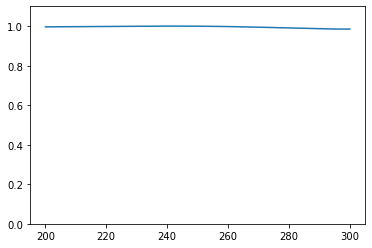

Test 3
True shape: [0.2963065  0.3        0.2370452  0.2        0.19753767 0.2       ]
Predicted shape: [[0.2783215  0.26100606 0.24721411 0.23570469 0.23045738 0.23399867]]



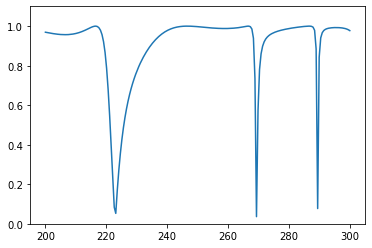

Test 4
True shape: [0.4        0.39015067 0.39015067 0.4        0.338636   0.3       ]
Predicted shape: [[0.3636202  0.34087867 0.325329   0.33002156 0.35687244 0.39777377]]



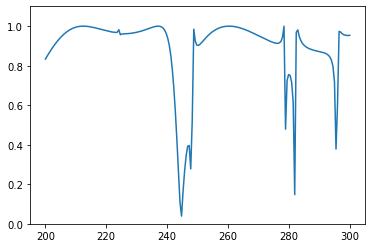

Test 5
True shape: [0.4        0.338636   0.3        0.31945452 0.35084526 0.4       ]
Predicted shape: [[0.37695637 0.37249774 0.37102023 0.3619337  0.3649491  0.36627445]]



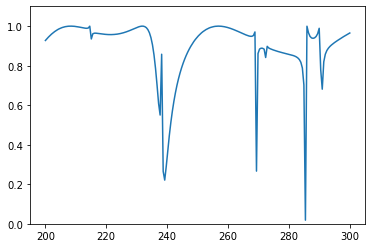

Test 6
True shape: [0.1        0.09753767 0.09753767 0.1        0.1        0.09876883]
Predicted shape: [[0.11787534 0.11126211 0.11124623 0.10490853 0.10721543 0.10963205]]



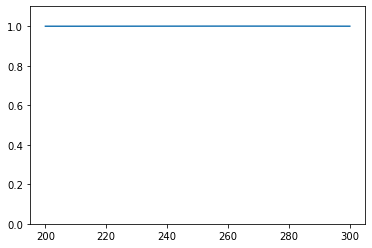

Test 7
True shape: [0.28531695 0.28887347 0.3        0.2        0.2370452  0.3       ]
Predicted shape: [[0.2604493  0.25205013 0.24875128 0.22955596 0.21976031 0.2150829 ]]



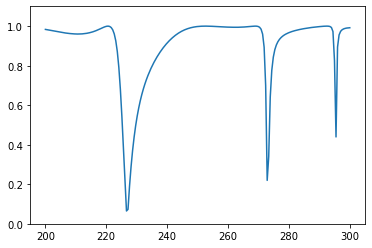

Test 8
True shape: [0.1        0.09876883 0.1        0.1        0.09629116 0.09510565]
Predicted shape: [[0.11787665 0.11126202 0.1112442  0.10490853 0.10721515 0.10963224]]



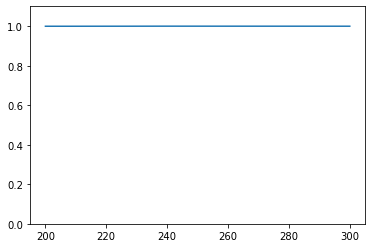

Test 9
True shape: [0.4        0.338636   0.3        0.25051498 0.21968701 0.2       ]
Predicted shape: [[0.37695637 0.37249774 0.37102023 0.3619337  0.3649491  0.36627445]]



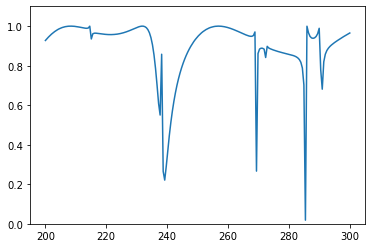

Test 10
True shape: [0.1902113  0.19258231 0.2        0.2        0.13169178 0.1       ]
Predicted shape: [[0.16104859 0.15179282 0.1457077  0.13322899 0.1477667  0.15358964]]



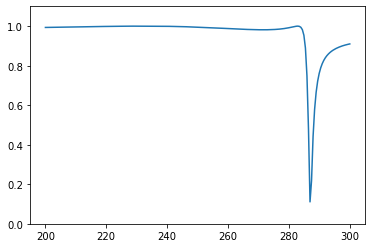

Test 11
True shape: [0.38042261 0.38516462 0.4        0.3        0.338636   0.4       ]
Predicted shape: [[0.38185984 0.3816131  0.3950171  0.3023286  0.24677818 0.21091205]]



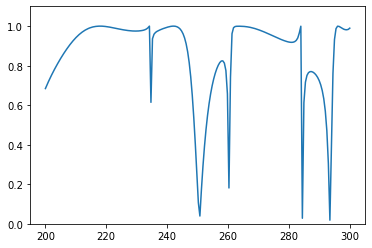

Test 12
True shape: [0.47552826 0.48145578 0.5        0.51662739 0.54836575 0.6       ]
Predicted shape: [[0.49873263 0.48748794 0.48267844 0.49323902 0.49500504 0.50129354]]



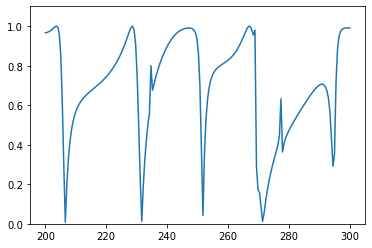

Test 13
True shape: [0.4        0.338636   0.3        0.3        0.28887347 0.28531695]
Predicted shape: [[0.3649726  0.35601902 0.36094728 0.39373246 0.38228378 0.37496418]]



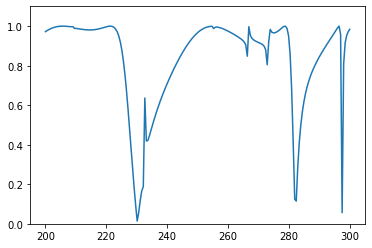

Test 14
True shape: [0.3        0.28887347 0.28531695 0.28887347 0.3        0.2       ]
Predicted shape: [[0.274703   0.26224166 0.26301163 0.2466236  0.2060503  0.19173999]]



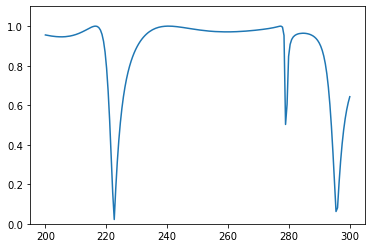

Test 15
True shape: [0.2        0.2370452  0.3        0.28105791 0.27063391 0.26730196]
Predicted shape: [[0.28556663 0.22625309 0.19999757 0.1717461  0.1618212  0.15674944]]



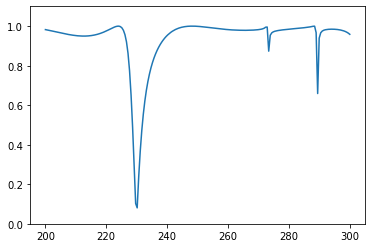

Test 16
True shape: [0.3       0.292613  0.292613  0.3       0.2963065 0.3      ]
Predicted shape: [[0.2960797  0.29574668 0.2921724  0.2855997  0.28612342 0.28543642]]



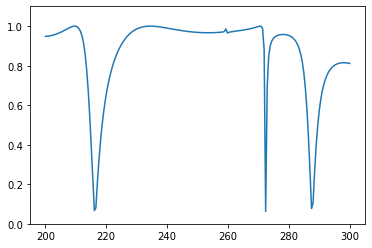

Test 17
True shape: [0.2        0.13169178 0.1        0.09368597 0.0902113  0.08910065]
Predicted shape: [[0.14520451 0.13355085 0.1514765  0.16941753 0.19702634 0.19858406]]



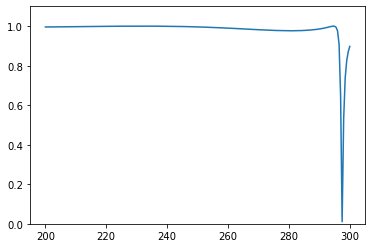

Test 18
True shape: [0.4        0.35084526 0.31945452 0.3        0.2370452  0.2       ]
Predicted shape: [[0.3636202  0.34087867 0.325329   0.33002156 0.35687244 0.39777377]]



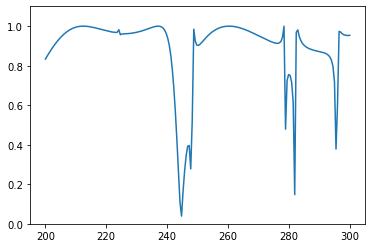

Test 19
True shape: [0.3        0.4        0.3631924  0.34026032 0.3276406  0.3236068 ]
Predicted shape: [[0.35601565 0.31189406 0.25980806 0.24940288 0.2420507  0.24969015]]



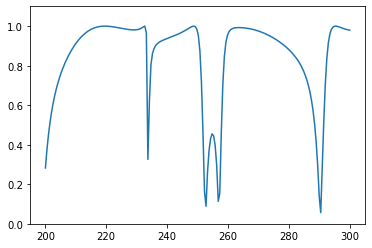

Test 20
True shape: [0.4        0.40597245 0.42269179 0.45246718 0.5        0.49384417]
Predicted shape: [[0.3883096  0.40442735 0.42888784 0.48077595 0.48301607 0.39709064]]



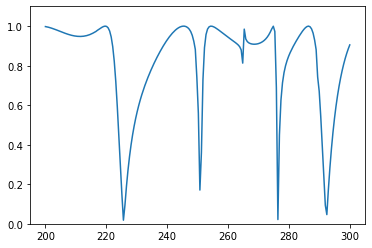

Test 21
True shape: [0.19753767 0.2        0.13169178 0.1        0.13169178 0.2       ]
Predicted shape: [[0.20291692 0.17410913 0.15537122 0.14206186 0.12832654 0.12687138]]



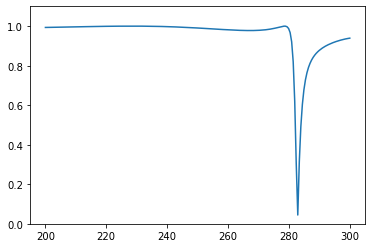

Test 22
True shape: [0.2        0.19507534 0.19507534 0.2        0.19753767 0.2       ]
Predicted shape: [[0.18095067 0.1772632  0.18391901 0.17251092 0.17763497 0.17869218]]



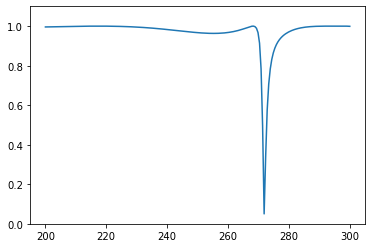

Test 23
True shape: [0.5        0.4        0.3631924  0.34026032 0.3276406  0.3236068 ]
Predicted shape: [[0.4709033  0.4882829  0.5040411  0.4863148  0.4825382  0.46937463]]



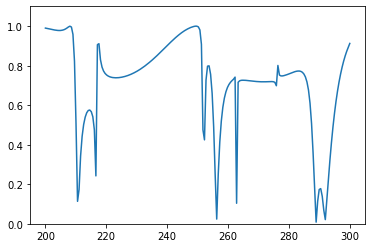

Test 24
True shape: [0.1        0.13169178 0.2        0.19753767 0.2        0.19753767]
Predicted shape: [[0.11850721 0.1144273  0.12001398 0.11416557 0.12182556 0.12272742]]



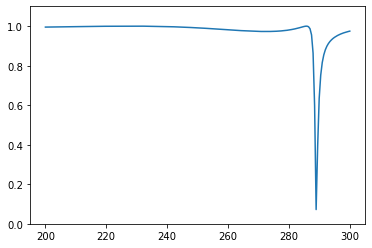

Test 25
True shape: [0.39507534 0.4        0.3631924  0.34026032 0.3276406  0.3236068 ]
Predicted shape: [[0.40033194 0.41098613 0.40392235 0.35795653 0.33385253 0.31500858]]



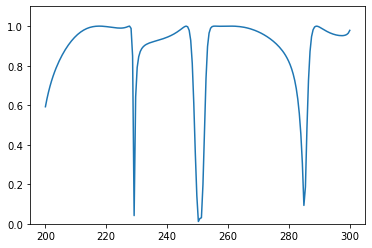

Test 26
True shape: [0.2        0.14600443 0.11723925 0.1        0.1        0.09876883]
Predicted shape: [[0.15506518 0.1523534  0.1783694  0.20166245 0.25272655 0.27740595]]



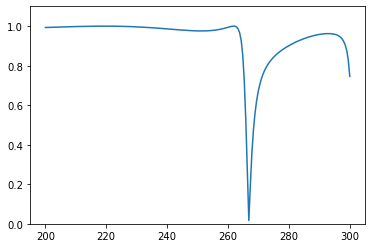

Test 27
True shape: [0.39507534 0.4        0.338636   0.3        0.28887347 0.28531695]
Predicted shape: [[0.32055947 0.32783657 0.3543778  0.40030134 0.389686   0.3833961 ]]



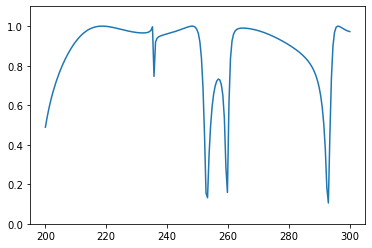

Test 28
True shape: [0.2        0.13169178 0.1        0.09876883 0.1        0.09876883]
Predicted shape: [[0.1682609  0.15055302 0.16797408 0.18922693 0.22814627 0.24165584]]



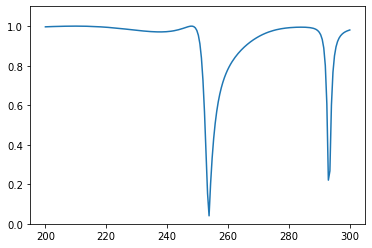

Test 29
True shape: [0.28284271 0.28636838 0.29739843 0.3174418  0.34961282 0.4       ]
Predicted shape: [[0.3102554  0.2897635  0.28168982 0.27006698 0.2709648  0.27455685]]



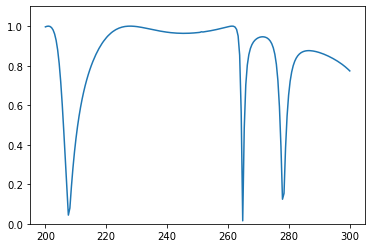

Test 30
True shape: [0.2        0.2370452  0.3        0.338636   0.4        0.39507534]
Predicted shape: [[0.31184363 0.24988073 0.22360593 0.1934616  0.186803   0.18170851]]



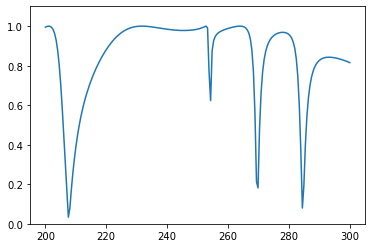

Test 31
True shape: [0.19753767 0.2        0.19753767 0.2        0.19258231 0.1902113 ]
Predicted shape: [[0.16766891 0.1641432  0.16779584 0.15652171 0.16001752 0.16182761]]



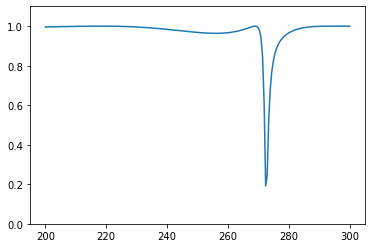

Test 32
True shape: [0.1        0.2        0.1815962  0.17013016 0.1638203  0.1618034 ]
Predicted shape: [[0.11557564 0.11021915 0.11250371 0.1056025  0.1070853  0.10844184]]



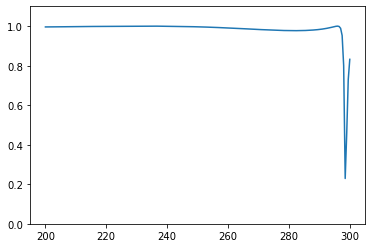

Test 33
True shape: [0.3       0.2963065 0.3       0.2963065 0.3       0.2963065]
Predicted shape: [[0.31184363 0.24988073 0.22360593 0.1934616  0.186803   0.18170851]]



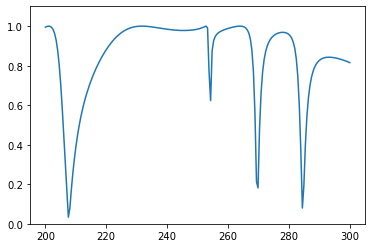

Test 34
True shape: [0.38042261 0.38516462 0.4        0.4        0.4389726  0.5       ]
Predicted shape: [[0.37376744 0.36697683 0.36852655 0.3649868  0.37962368 0.39385802]]



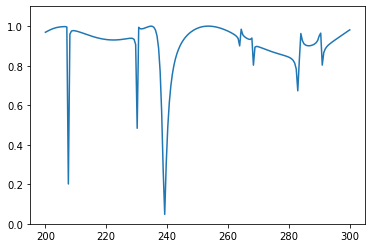

Test 35
True shape: [0.09876883 0.1        0.09629116 0.09510565 0.09629116 0.1       ]
Predicted shape: [[0.11784983 0.11123797 0.11122251 0.10488719 0.10719651 0.10961388]]



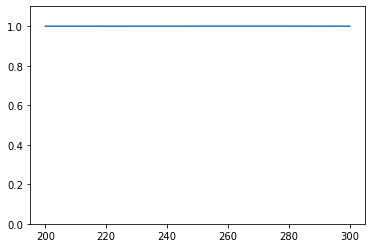

Test 36
True shape: [0.2       0.2370452 0.3       0.2963065 0.3       0.2963065]
Predicted shape: [[0.22437438 0.24041381 0.27072108 0.2963789  0.30230683 0.3127198 ]]



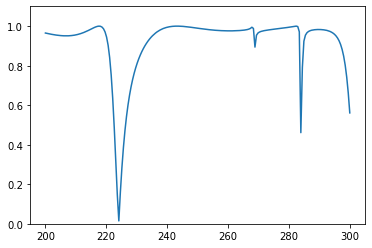

Test 37
True shape: [0.1        0.11723925 0.14600443 0.2        0.19258231 0.1902113 ]
Predicted shape: [[0.12063912 0.11390004 0.11392203 0.10700268 0.10914229 0.11139201]]



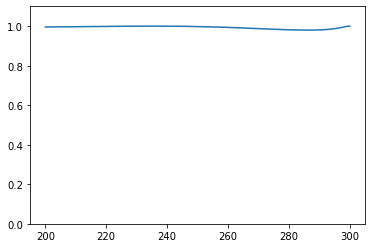

Test 38
True shape: [0.1902113  0.19258231 0.2        0.2        0.19753767 0.2       ]
Predicted shape: [[0.1731562  0.16959131 0.17460436 0.16314071 0.16646689 0.16771676]]



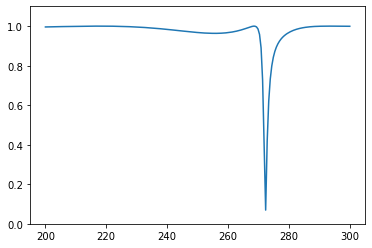

Test 39
True shape: [0.1        0.13169178 0.2        0.3        0.28887347 0.28531695]
Predicted shape: [[0.14225233 0.12755394 0.11398238 0.12302798 0.12601191 0.13562284]]



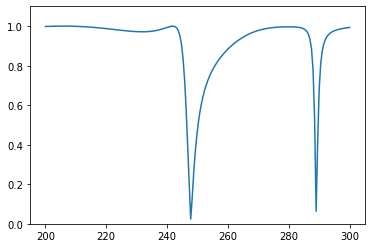

Test 40
True shape: [0.2        0.21968701 0.25051498 0.3        0.2370452  0.2       ]
Predicted shape: [[0.20195255 0.196872   0.1989612  0.1888527  0.19061542 0.19297948]]



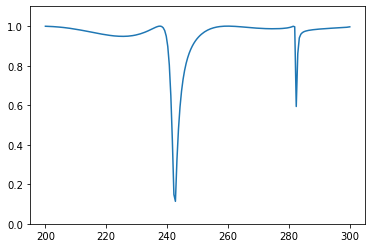

Test 41
True shape: [0.2963065  0.3        0.2723943  0.25519524 0.24573045 0.2427051 ]
Predicted shape: [[0.29510164 0.25504923 0.23526368 0.21468729 0.2086098  0.20876552]]



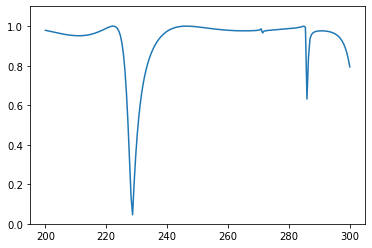

Test 42
True shape: [0.2963065 0.3       0.2963065 0.3       0.338636  0.4      ]
Predicted shape: [[0.24017406 0.22776267 0.22261682 0.2281912  0.22843733 0.23362218]]



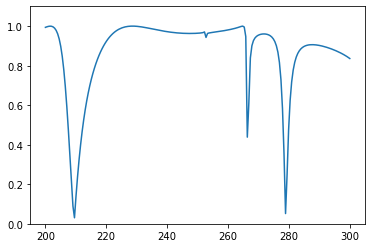

Test 43
True shape: [0.4        0.338636   0.3        0.2        0.19258231 0.1902113 ]
Predicted shape: [[0.3649726  0.35601902 0.36094728 0.39373246 0.38228378 0.37496418]]



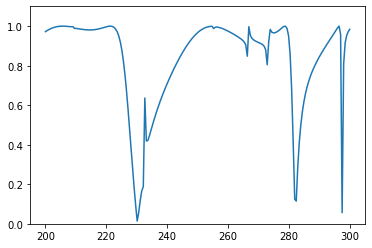

Test 44
True shape: [0.3        0.28503952 0.27802091 0.27802091 0.28503952 0.3       ]
Predicted shape: [[0.2893088  0.26849562 0.26127407 0.2447615  0.21802963 0.20911488]]



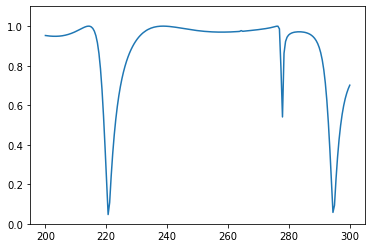

Test 45
True shape: [0.19753767 0.2        0.15329674 0.12680754 0.11044282 0.1       ]
Predicted shape: [[0.12043729 0.11379072 0.1139583  0.10726821 0.10926205 0.11148153]]



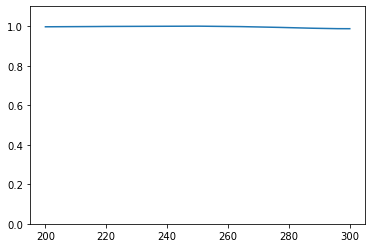

Test 46
True shape: [0.1        0.11044282 0.12680754 0.15329674 0.2        0.1       ]
Predicted shape: [[0.11935776 0.1127252  0.11281237 0.10630479 0.10844709 0.11075428]]



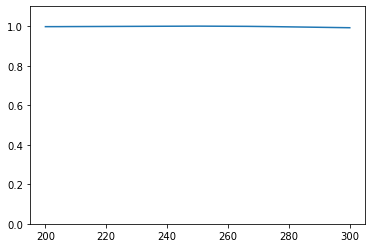

Test 47
True shape: [0.4        0.39507534 0.4        0.39507534 0.4        0.39507534]
Predicted shape: [[0.4031601  0.35253456 0.32362014 0.30147368 0.29485977 0.29529145]]



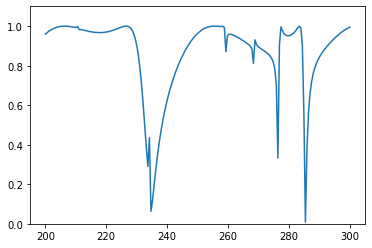

Test 48
True shape: [0.3        0.25051498 0.21968701 0.2        0.2370452  0.3       ]
Predicted shape: [[0.2727607  0.25352037 0.2383011  0.23004648 0.21615705 0.21753773]]



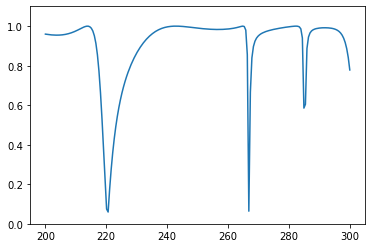

Test 49
True shape: [0.09876883 0.1        0.13169178 0.2        0.2370452  0.3       ]
Predicted shape: [[0.20291692 0.17410913 0.15537122 0.14206186 0.12832654 0.12687138]]



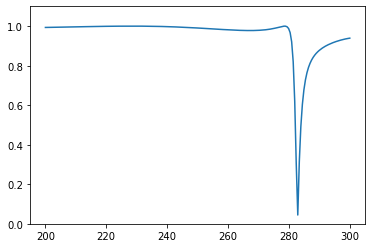

Test 50
True shape: [0.4        0.40597245 0.42269179 0.45246718 0.5        0.5       ]
Predicted shape: [[0.38199723 0.39494404 0.42600378 0.47409615 0.45052108 0.39940223]]



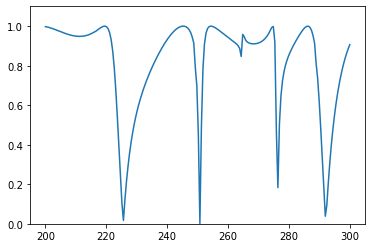

Test 51
True shape: [0.3        0.25051498 0.21968701 0.2        0.19258231 0.1902113 ]
Predicted shape: [[0.20780027 0.21687964 0.24128273 0.2627194  0.25583762 0.25255233]]



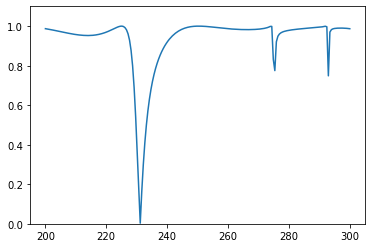

Test 52
True shape: [0.28531695 0.28887347 0.3        0.28105791 0.27063391 0.26730196]
Predicted shape: [[0.28294393 0.2652346  0.26025006 0.24042055 0.21196753 0.20185481]]



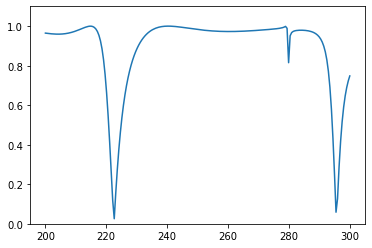

Test 53
True shape: [0.3        0.338636   0.4        0.4389726  0.5        0.49384417]
Predicted shape: [[0.4031601  0.35253456 0.32362014 0.30147368 0.29485977 0.29529145]]



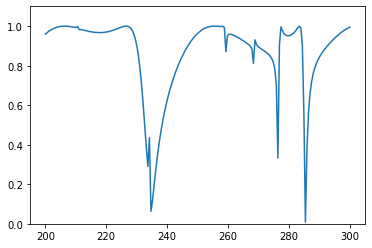

Test 54
True shape: [0.09876883 0.1        0.13169178 0.2        0.13169178 0.1       ]
Predicted shape: [[0.11903822 0.112398   0.11244777 0.10598543 0.10815668 0.11048927]]



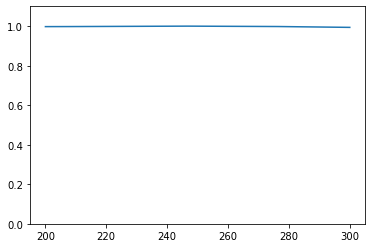

Test 55
True shape: [0.09876883 0.1        0.13169178 0.2        0.19258231 0.1902113 ]
Predicted shape: [[0.12136573 0.11462399 0.11474842 0.10781828 0.1096528  0.11181059]]



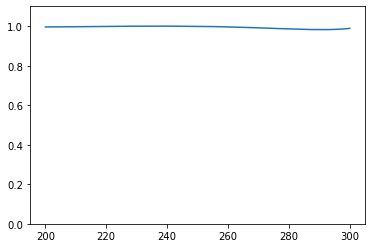

Test 56
True shape: [0.2        0.19507534 0.19507534 0.2        0.2        0.19753767]
Predicted shape: [[0.20179471 0.19031972 0.20338586 0.2233195  0.25971976 0.27694693]]



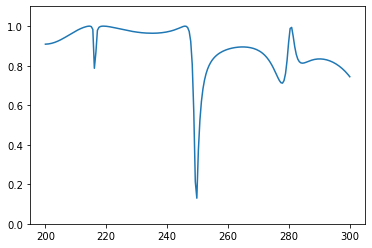

Test 57
True shape: [0.2963065  0.3        0.31945452 0.35084526 0.4        0.39507534]
Predicted shape: [[0.3410076  0.32615736 0.32254887 0.32671756 0.3490978  0.36811283]]



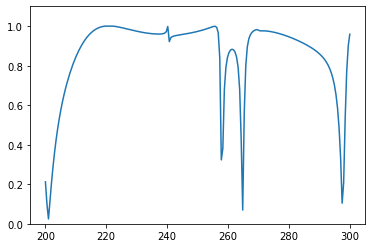

Test 58
True shape: [0.38042261 0.38516462 0.4        0.41826582 0.44988746 0.5       ]
Predicted shape: [[0.24604252 0.22880805 0.23392472 0.26375073 0.2747623  0.27665797]]



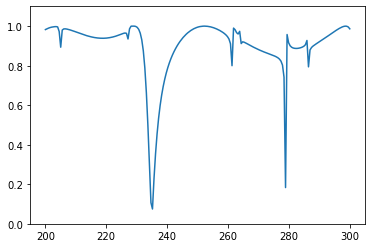

Test 59
True shape: [0.09510565 0.09629116 0.1        0.2        0.13169178 0.1       ]
Predicted shape: [[0.11861041 0.1119667  0.11197475 0.10556719 0.107781   0.11014695]]



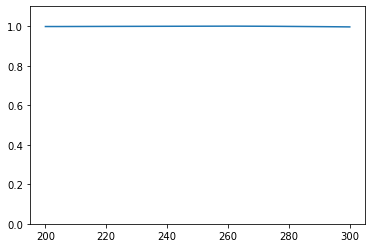

Test 60
True shape: [0.07071068 0.0715921  0.07434961 0.07936045 0.0874032  0.1       ]
Predicted shape: [[0.11775911 0.11115271 0.1111384  0.10480386 0.10712041 0.10954101]]



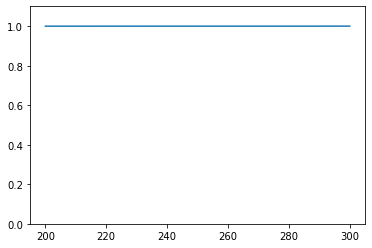

Test 61
True shape: [0.5        0.45246718 0.42269179 0.40597245 0.4        0.39507534]
Predicted shape: [[0.3883096  0.40442735 0.42888784 0.48077595 0.48301607 0.39709064]]



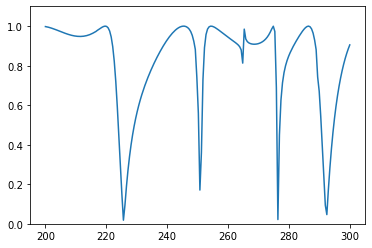

Test 62
True shape: [0.2        0.19753767 0.2        0.13169178 0.1        0.09876883]
Predicted shape: [[0.1682609  0.15055302 0.16797408 0.18922693 0.22814627 0.24165584]]



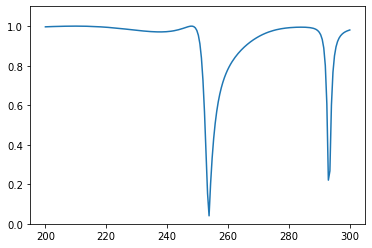

Test 63
True shape: [0.19753767 0.2        0.21968701 0.25051498 0.3        0.2963065 ]
Predicted shape: [[0.38583112 0.3796189  0.38182828 0.3800658  0.39065653 0.3978739 ]]



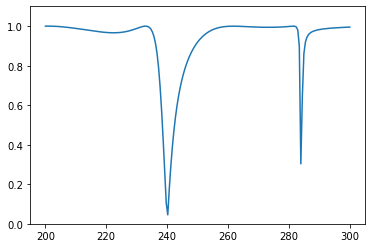

Test 64
True shape: [0.1        0.13169178 0.2        0.2        0.19258231 0.1902113 ]
Predicted shape: [[0.1420652  0.15635264 0.18923423 0.18606532 0.20204704 0.19755091]]



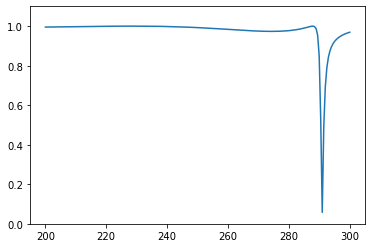

In [57]:
x = np.genfromtxt('meep_code/data/SP_xaxis.txt')
for i in range(len(test_X)):
    print('Test '+str(i))
    print('True shape: ' + str(test_Y[i]))
    print('Predicted shape: ' + str(model.predict(np.reshape(test_X[i], (1, 200))))+'\n')
    plt.ylim(0, 1.1)
    plt.plot(x, np.subtract(test_X[i], -0.5))
    plt.show()

dropout loss 0.017
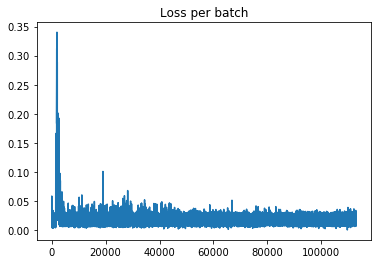

1021 sample validate on 256
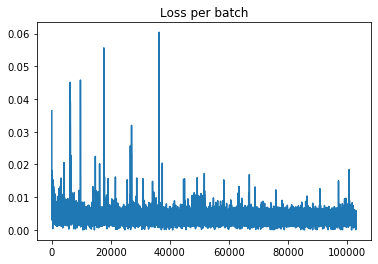

In [10]:
for i in range(len(test_X)):
    print('Test '+str(i))
    print('True shape: ' + str(test_Y[i]))
    print('Predicted shape: ' + str(model.predict(np.reshape(test_X[i], (1, 200))))+'\n')
    

Test 0
True shape: [0.2        0.17480641 0.1587209  0.14869921 0.14318419 0.14142136]
Predicted shape: [[0.09833518 0.10215363 0.1023652  0.10111508 0.10271542 0.09918966]]

Test 1
True shape: [0.49384417 0.5        0.4389726  0.4        0.4389726  0.5       ]
Predicted shape: [[0.47523662 0.47215676 0.45924208 0.4429709  0.43067187 0.42093578]]

Test 2
True shape: [0.39507534 0.4        0.35485183 0.32607652 0.30864787 0.3       ]
Predicted shape: [[0.31991267 0.33449268 0.34625506 0.3689741  0.38036034 0.34532884]]

Test 3
True shape: [0.47552826 0.48145578 0.5        0.5        0.49384417 0.5       ]
Predicted shape: [[0.47526106 0.47092906 0.47143123 0.44335935 0.430607   0.42395484]]

Test 4
True shape: [0.1        0.13169178 0.2        0.19507534 0.19507534 0.2       ]
Predicted shape: [[0.09027192 0.09437856 0.0943104  0.09369335 0.09453187 0.09038924]]

Test 5
True shape: [0.49384417 0.5        0.4539905  0.4253254  0.40955075 0.4045085 ]
Predicted shape: [[0.46458623 0.471905

Predicted shape: [[0.48677015 0.46702027 0.4336757  0.41958478 0.40852347 0.40238833]]

Test 76
True shape: [0.4        0.39507534 0.4        0.37474388 0.36084521 0.35640261]
Predicted shape: [[0.2217597  0.21930099 0.21772915 0.21100286 0.21701305 0.21851054]]

Test 77
True shape: [0.3        0.28887347 0.28531695 0.28887347 0.3        0.2       ]
Predicted shape: [[0.28413022 0.27508032 0.2685581  0.25606495 0.25122574 0.2516231 ]]



In [11]:
model.predict(np.reshape(test_X[1], (1, 200)))

array([[0.47523662, 0.47215676, 0.45924208, 0.4429709 , 0.43067187,
        0.42093578]], dtype=float32)

In [12]:
test_Y[1]

array([0.49384417, 0.5       , 0.4389726 , 0.4       , 0.4389726 ,
       0.5       ])

In [13]:
np.savetxt('Prediction/2019_7_15_1_p.txt', predict_Y[0])

NameError: name 'predict_Y' is not defined